In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy import optimize
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize
from scipy import stats
from lora_diagnostic_lib_example import cleanData,computeDiff
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('anonymized_spazio_radio_v2.csv')

In [3]:
#cleanData return: a DataFrame with NaN values dropped, main column selected, SF and BW extracted along with FCnt values
data = cleanData(df)

Shape dropping NaN values: (186632, 23)
Shape dropping duplicates and selecting main columns: (186632, 13)
Shape index resetted: (186632, 13)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186632 entries, 0 to 186631
Data columns (total 16 columns):
dev_eui       186632 non-null object
datr          186632 non-null object
lsnr          186632 non-null float64
freq          186632 non-null float64
rssis         176025 non-null float64
size          186632 non-null int64
gateway       186632 non-null object
tmst          186632 non-null int64
FCnt          181526 non-null float64
created_at    186632 non-null object
ns_time       186632 non-null object
codr          186632 non-null object
dev_addr      186632 non-null object
SF            186632 non-null int64
BW            186632 non-null int64
airtime       186632 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 22.8+ MB


In [5]:
data.shape

(186632, 16)

In [6]:
new = computeDiff(data,None,None,None,None,'dev_eui')

In [7]:
new = new[0]

In [8]:
new.iloc[:,-3:].columns

Index(['airtime8681', 'airtime8683', 'airtime8685'], dtype='object')

In [9]:
for col in new.iloc[:,-3:].columns:
    new[col] = new[col] / new.airtime

In [10]:
new.shape

(290, 19)

In [11]:
new.head()

,dev_eui,time_diff_mean,time_to_hours,snr,sf,freq,rssi,Error_rate,success_rate,airtime,pkt_num,airtime8671,airtime8673,airtime8675,airtime8677,airtime8679,airtime8681,airtime8683,airtime8685
0,0000000000000003,11:08:48.308097,11.15,-7.68,12,868.1,-116.82,0.19,0.81,195732.1728,225,0,0,0,0,0,0.368813,0.269866,0.361321
1,0000000000000016,11:11:14.138718,11.19,-6.97,12,868.1,-115.52,0.07,0.93,666252.2880,561,0,0,0,0,0,0.339987,0.349556,0.310457
2,0000000000000095,11:14:21.257015,11.24,5.41,7,868.5,-99.69,0.70,0.30,348035.3280,755,0,0,0,0,0,0.333041,0.299707,0.367252
3,0000000000000023,11:15:10.972997,11.25,2.75,7,868.5,-104.70,0.54,0.46,404370.1248,755,0,0,0,0,0,0.255589,0.410995,0.333416
4,000000000000008a,11:14:44.790960,11.25,4.29,7,868.5,-102.09,0.56,0.44,400043.0592,756,0,0,0,0,0,0.360778,0.317835,0.321387


In [12]:
X = new.iloc[:,2:].values

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X[:,:-3])

In [14]:
wcss=[]
dbs=[]
for i in range(2,21): 
    kmeans = KMeans(n_clusters=i,\
                    random_state=0,n_jobs=6 ).fit(X_train)
#inertia_ : Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    dbs.append(davies_bouldin_score(X_train, labels))
    print('clustering with k = {} done!'.format(i))

clustering with k = 2 done!
clustering with k = 3 done!
clustering with k = 4 done!
clustering with k = 5 done!
clustering with k = 6 done!
clustering with k = 7 done!
clustering with k = 8 done!
clustering with k = 9 done!
clustering with k = 10 done!
clustering with k = 11 done!
clustering with k = 12 done!
clustering with k = 13 done!
clustering with k = 14 done!
clustering with k = 15 done!
clustering with k = 16 done!
clustering with k = 17 done!
clustering with k = 18 done!
clustering with k = 19 done!
clustering with k = 20 done!


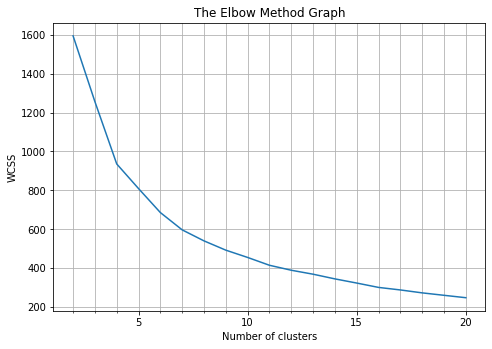

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
major_ticks = np.arange(0, 21, 5)
minor_ticks = np.arange(0, 21, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.set_facecolor('xkcd:white')
plt.plot(np.arange(2,21),wcss)
ax.set_title("The Elbow Method Graph")
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

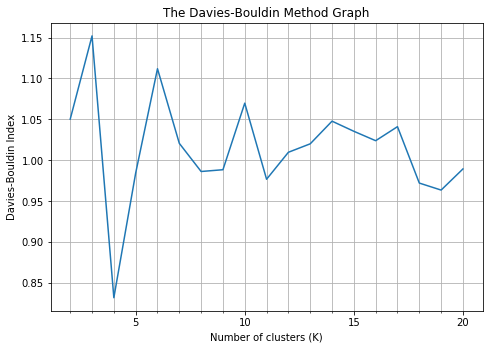

In [16]:
#Plot the Davies-Bouldin graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
major_ticks = np.arange(0, 21, 5)
minor_ticks = np.arange(0, 21, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.set_facecolor('xkcd:white')
plt.plot(range(2,21),dbs)
plt.title('The Davies-Bouldin Method Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.show

In [17]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(X_train)
clusters = model.predict(X_train).reshape((len(X_train),1))
new['cluster'] = clusters

In [18]:
new.head()

,dev_eui,time_diff_mean,time_to_hours,snr,sf,freq,rssi,Error_rate,success_rate,airtime,pkt_num,airtime8671,airtime8673,airtime8675,airtime8677,airtime8679,airtime8681,airtime8683,airtime8685,cluster
0,0000000000000003,11:08:48.308097,11.15,-7.68,12,868.1,-116.82,0.19,0.81,195732.1728,225,0,0,0,0,0,0.368813,0.269866,0.361321,3
1,0000000000000016,11:11:14.138718,11.19,-6.97,12,868.1,-115.52,0.07,0.93,666252.2880,561,0,0,0,0,0,0.339987,0.349556,0.310457,3
2,0000000000000095,11:14:21.257015,11.24,5.41,7,868.5,-99.69,0.70,0.30,348035.3280,755,0,0,0,0,0,0.333041,0.299707,0.367252,1
3,0000000000000023,11:15:10.972997,11.25,2.75,7,868.5,-104.70,0.54,0.46,404370.1248,755,0,0,0,0,0,0.255589,0.410995,0.333416,1
4,000000000000008a,11:14:44.790960,11.25,4.29,7,868.5,-102.09,0.56,0.44,400043.0592,756,0,0,0,0,0,0.360778,0.317835,0.321387,1


In [19]:
data_labeled = pd.merge(data,pd.DataFrame(new[['dev_eui','cluster']]),on = 'dev_eui')

In [20]:
labels_packet_number = data_labeled.groupby(['cluster']).size().to_dict()

In [21]:
labels_packet_number

{0: 73244, 1: 106501, 2: 583, 3: 6304}

# SNR histogram in reduced data (grouped by device)

In [87]:
color = ["#ff0000", "#0000ff", "#fed8b1", "#00ff00", "#e6e600", "#ff00ff","#0000e6",\
         "#006622", "#804000", "#6600ff", "#b30000", "#66ffff","#4d2600"]

cluster 0 : Red <br />
cluster 1 : Blue <br />
cluster 2 : Orange <br />
cluster 3 : Green <br />

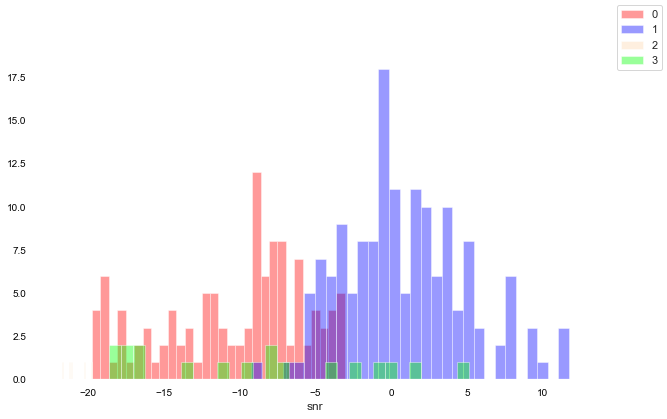

In [88]:
fig = plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'10', 'ytick.labelsize':'10'})
sns.set_palette(sns.color_palette(color),13)
for i in np.sort(new['cluster'].unique()):
        sns.distplot(new[new['cluster']==i]['snr'],label='cluster',kde=False,bins=30)
fig.legend(labels=np.sort(new['cluster'].unique()))

<Figure size 1152x432 with 0 Axes>

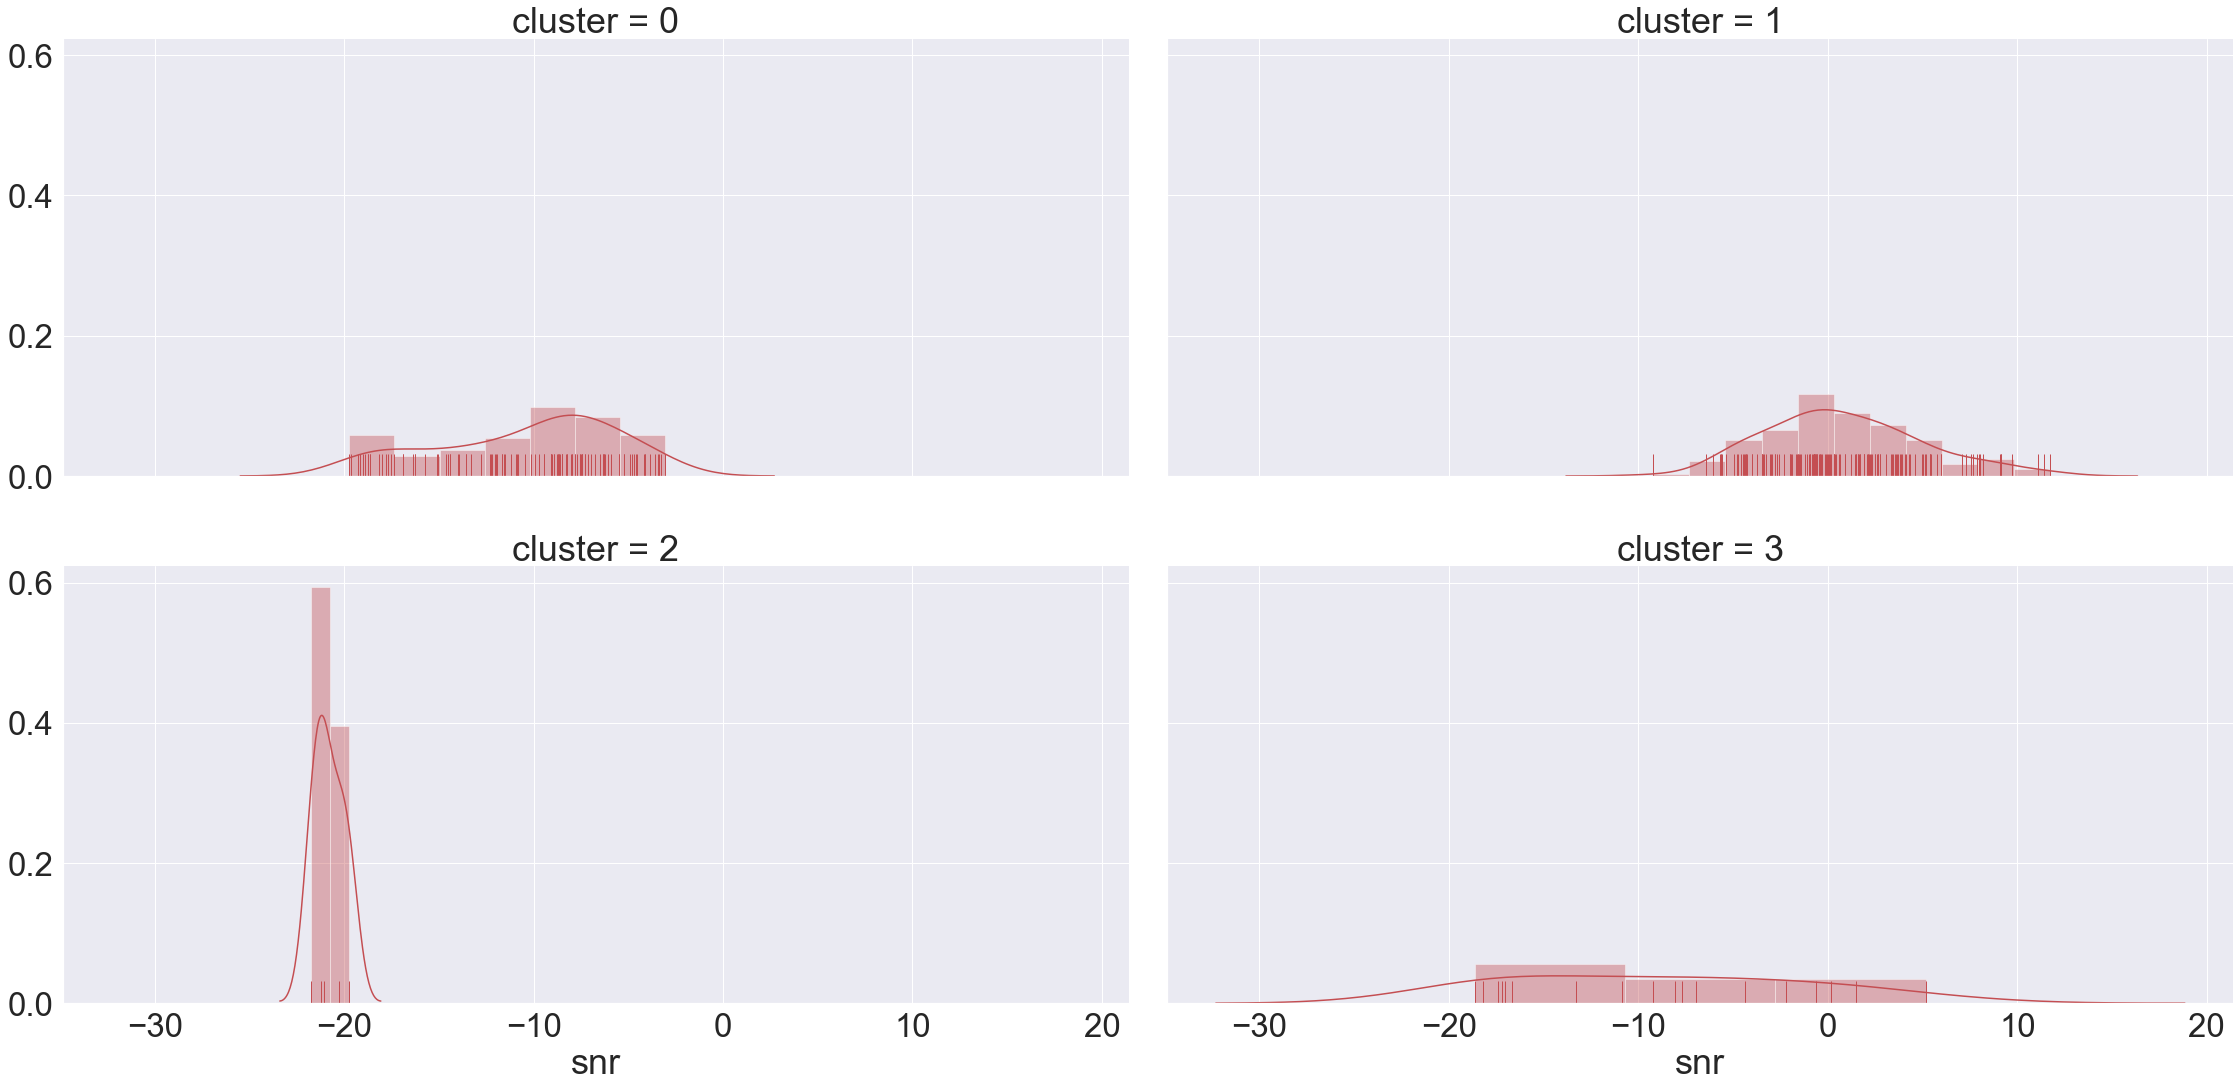

In [94]:
fig = plt.figure(figsize=(16,6))
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'20', 'ytick.labelsize':'20'})
sns.set(font_scale = 3)
g = sns.FacetGrid(new,col="cluster", col_wrap=2,height = 8, aspect=2)
g.map(sns.distplot, "snr", hist=True, rug=True, label = 'cluster',color="r");

# SNR histogram in original data (grouped by device)

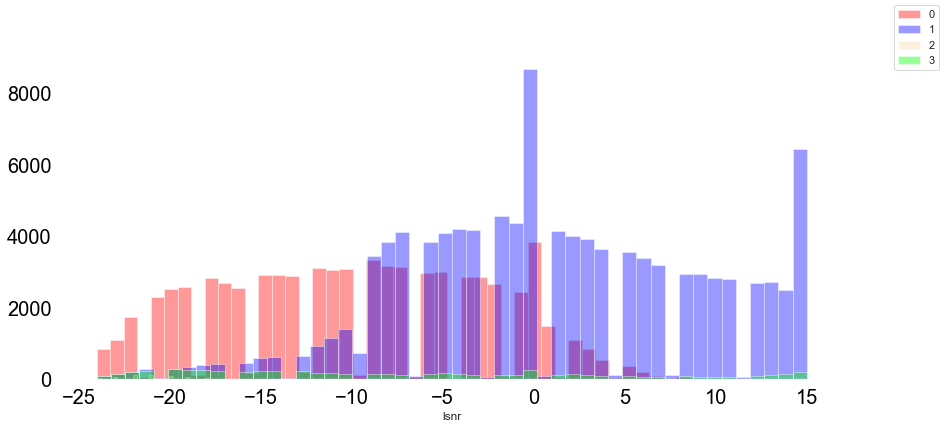

In [93]:
fig = plt.figure(figsize=(14,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'20', 'ytick.labelsize':'20'})
sns.set_palette(sns.color_palette(color),13)
for i in data_labeled['cluster'].unique():
    sns.distplot(data_labeled[data_labeled['cluster']==i]['lsnr'],label='cluster',kde=False,bins=50)
fig.legend(labels=np.sort(data_labeled['cluster'].unique()))

# RSSI histogram in reduced data (grouped by device)

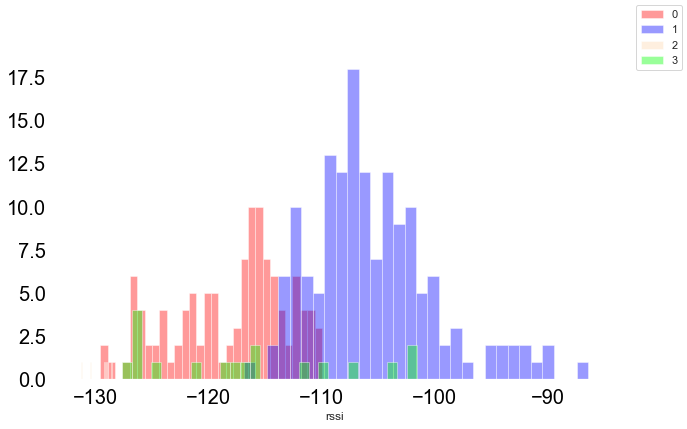

In [92]:
fig = plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'20', 'ytick.labelsize':'20'})
sns.set_palette(sns.color_palette(color),13)
for i in np.sort(new['cluster'].unique()):
    sns.distplot(new[new['cluster']==i]['rssi'],label='cluster',kde=False,bins=30)
fig.legend(labels=np.sort(new['cluster'].unique()))

<Figure size 720x576 with 0 Axes>

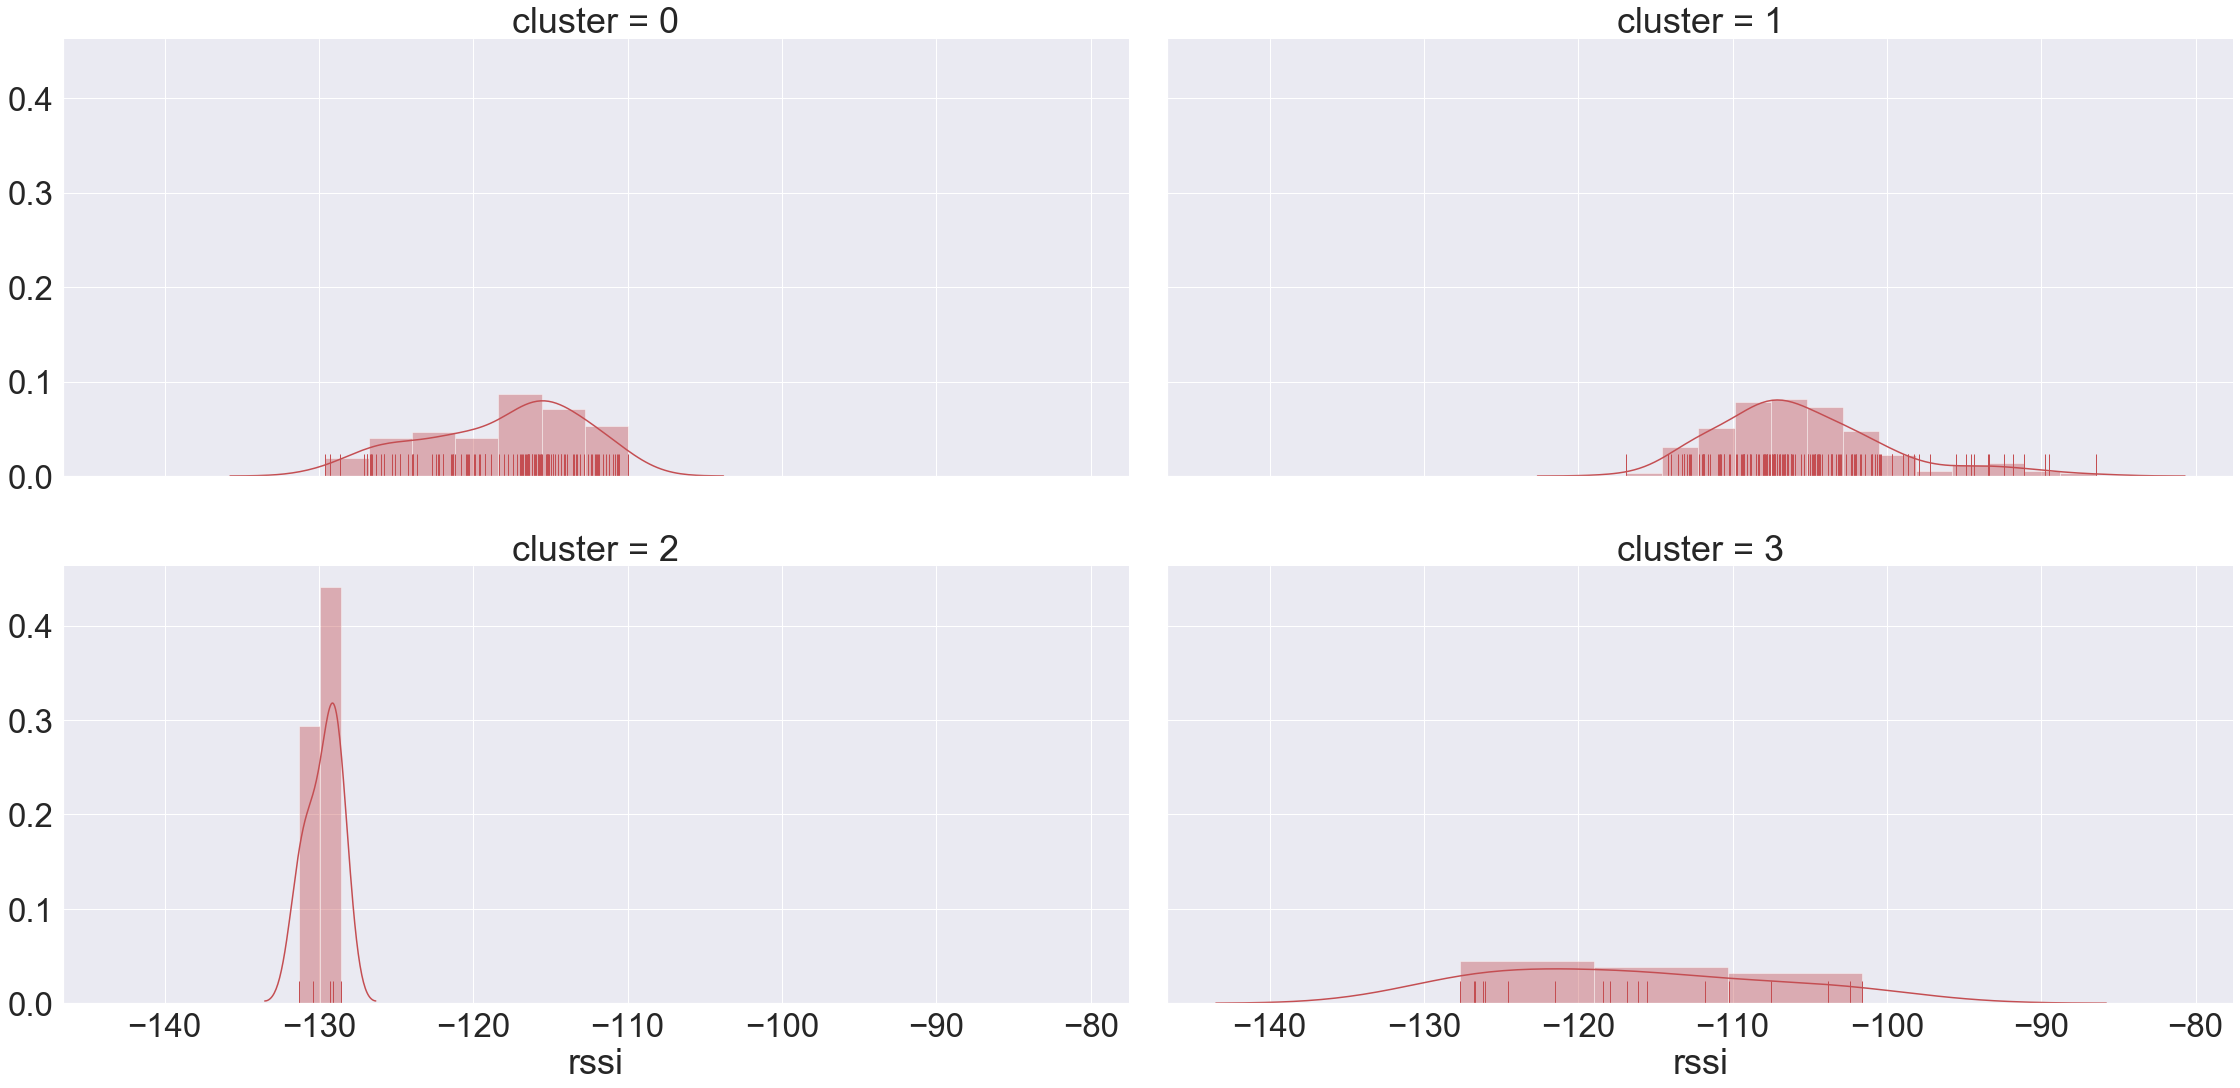

In [91]:
fig = plt.figure(figsize=(10,8))
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'20', 'ytick.labelsize':'20'})
sns.set(font_scale = 3)
g = sns.FacetGrid(new,col="cluster", col_wrap=2,height = 8, aspect=2)
g.map(sns.distplot, "rssi", hist=True, rug=True, label = 'cluster',color="r");

# RSSI histogram in original data (grouped by device)

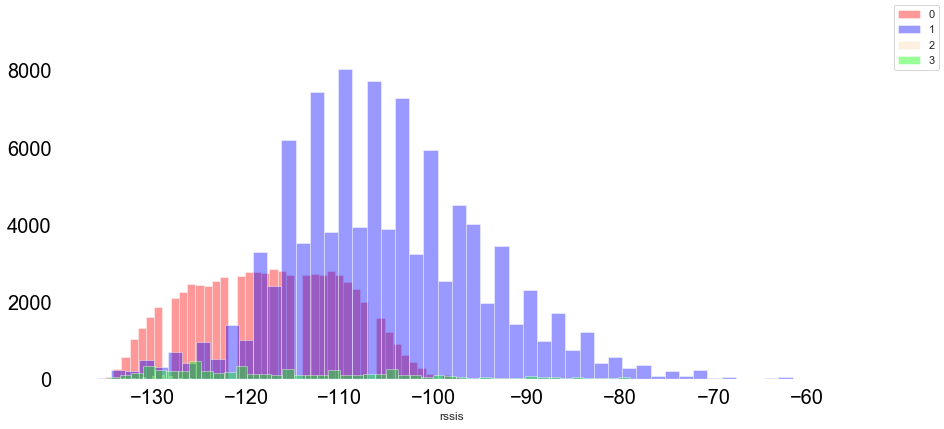

In [90]:
fig = plt.figure(figsize=(14,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white','xtick.color':'black','ytick.color':'black'\
          , 'xtick.labelsize':'20', 'ytick.labelsize':'20'})
sns.set_palette(sns.color_palette(color),13)
for i in data_labeled['cluster'].unique():
    sns.distplot(data_labeled[data_labeled['cluster']==i]['rssis'],label='cluster',kde=False,bins=50)
fig.legend(labels=np.sort(data_labeled['cluster'].unique()))

# Error Rate using FCnt in original data

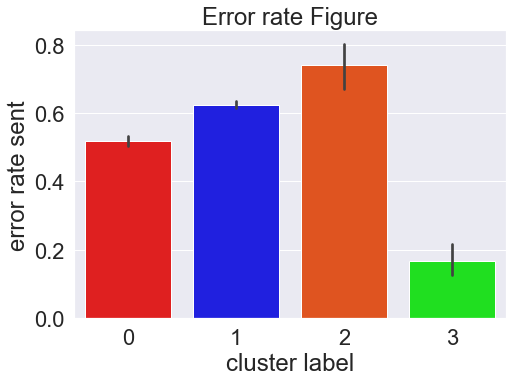

In [81]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
sns.set_palette(sns.color_palette(color),13)
ax = sns.barplot(x="cluster", y="Error_rate", data=new)
plt.title('Error rate Figure')
plt.xlabel('cluster label')
plt.ylabel('error rate sent')
plt.show()

# Number of Total Packets in original data

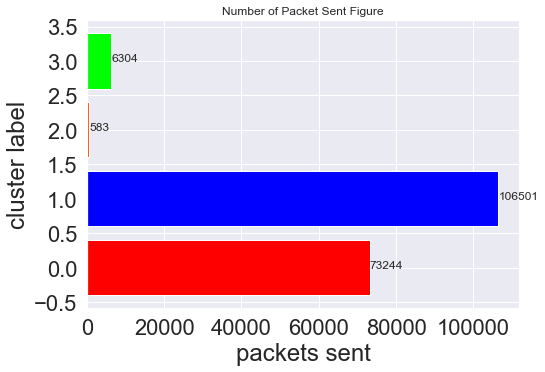

In [77]:
#{0: 6304, 1: 583, 2: 106501, 3: 73244}
x = list(labels_packet_number.keys())
y = list(labels_packet_number.values())

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
sns.set(font_scale = 1)
ax.barh(x, y, color=color)
plt.title('Number of Packet Sent Figure')
plt.ylabel('cluster label')
plt.xlabel('packets sent')
for index, value in enumerate(y):
    plt.text(value, index, str(value))

# 3D plot

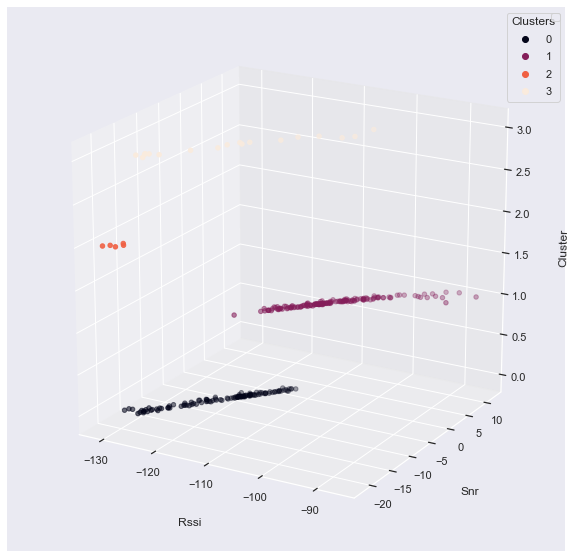

In [78]:
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
#ax = Axes3D(fig) # Method 1
ax = fig.add_subplot(111, projection='3d')

x = new.rssi
y = new.snr
z = new.cluster
scatter = ax.scatter(x, y, z, c=new.cluster, marker='o')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Rssi',labelpad = 20)
ax.set_ylabel('Snr',labelpad = 20)
ax.set_zlabel('Cluster',labelpad = 20)
ax.view_init(20,None)
ax.legend()
plt.show()

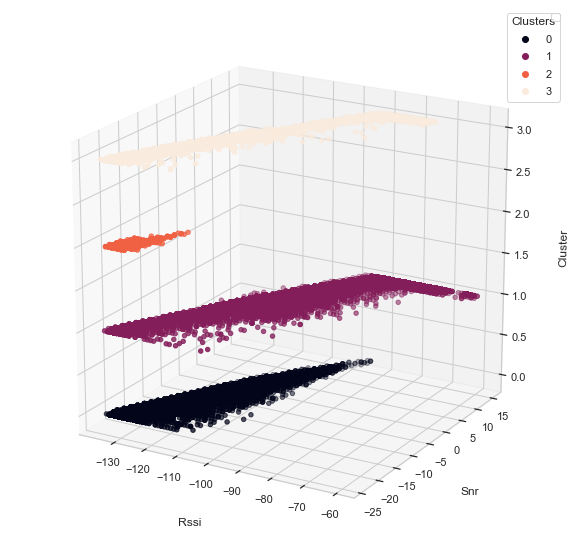

In [79]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,10))

#ax = Axes3D(fig) # Method 1
ax = fig.add_subplot(111, projection='3d')

x = data_labeled.rssis
y = data_labeled.lsnr
z = data_labeled.cluster
scatter = ax.scatter(x, y, z, c=data_labeled.cluster, marker='o')

legend2 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend2)

ax.set_xlabel('Rssi',labelpad = 20)
ax.set_ylabel('Snr',labelpad = 20)
ax.set_zlabel('Cluster',labelpad = 20)
ax.view_init(20,None)
ax.legend()
plt.show()